In [4]:
import numpy as np
from scipy.stats import skewnorm
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

In [1]:

def fit_skewnorm_from_asymmetric_bounds(mean, lower_error, upper_error, confidence=0.683):
    """
    Fit a skew-normal distribution given a central mean and asymmetric error bounds.

    Parameters:
    - mean: float, the central value (interpreted as the mean of the distribution)
    - lower_error: float, the distance below the mean (mean - lower bound)
    - upper_error: float, the distance above the mean (upper bound - mean)
    - confidence: float, probability mass between the bounds (default 68.3%)

    Returns:
    - alpha: skewness parameter
    - loc: location parameter (mean-shifted center)
    - scale: spread parameter (like std deviation)
    """
    lower_bound = mean - lower_error
    upper_bound = mean + upper_error
    scale_guess = (lower_error + upper_error) / 2

    def objective(alpha):
        delta = alpha / np.sqrt(1 + alpha**2)
        loc = mean - scale_guess * delta * np.sqrt(2 / np.pi)
        cdf_upper = skewnorm.cdf(upper_bound, alpha, loc=loc, scale=scale_guess)
        cdf_lower = skewnorm.cdf(lower_bound, alpha, loc=loc, scale=scale_guess)
        return abs((cdf_upper - cdf_lower) - confidence)

    result = minimize_scalar(objective, bounds=(-20, 20), method='bounded')
    alpha = result.x
    delta = alpha / np.sqrt(1 + alpha**2)
    loc = mean - scale_guess * delta * np.sqrt(2 / np.pi)

    return alpha, loc, scale_guess

(-0.08002057759581746, 2.1460461556607116, 0.095)

In [10]:
fit_skewnorm_from_asymmetric_bounds(2.14, 0.09, 0.1, confidence=0.683)


(-0.08002057759581746, 2.1460461556607116, 0.095)

In [2]:
skewnorm.pdf(2.14, -0.08002057759581746, 2.1460461556607116, 0.095)


4.207925680456691

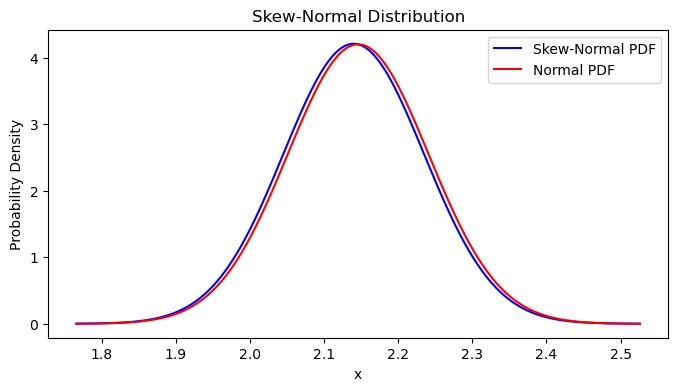

In [12]:
alpha, loc, scale = fit_skewnorm_from_asymmetric_bounds(2.14, 0.09, 0.1)

# Create x-values over a range that comfortably includes most of the PDF
x = np.linspace(loc - 4*scale, loc + 4*scale, 500)

# Get the PDF values
pdf = skewnorm.pdf(x, alpha, loc=loc, scale=scale)
norm = skewnorm.pdf(x, 0, loc=loc, scale=scale)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='Skew-Normal PDF', color='blue')
plt.plot(x, norm, label='Normal PDF', color='red')
#plt.axvline(2.14, color='red', linestyle='--', label='Mean = 2.14')
plt.title("Skew-Normal Distribution")
plt.xlabel("Mass")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


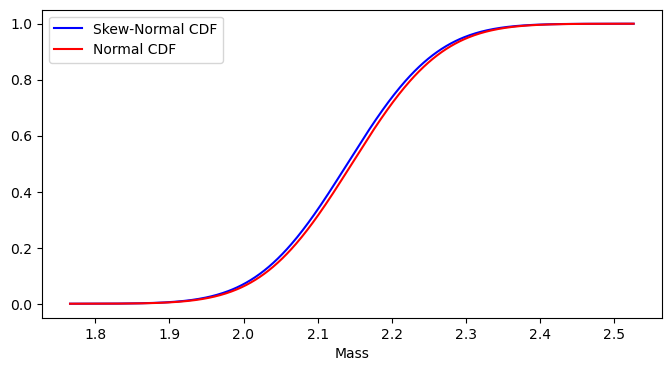

In [15]:
alpha, loc, scale = fit_skewnorm_from_asymmetric_bounds(2.14, 0.09, 0.1)

# Create x-values over a range that comfortably includes most of the PDF
x = np.linspace(loc - 4*scale, loc + 4*scale, 500)

# Get the PDF values
cdf = skewnorm.cdf(x, alpha, loc=loc, scale=scale)
cdf_norm = skewnorm.cdf(x, 0, loc=loc, scale=scale)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, cdf, label='Skew-Normal CDF', color='blue')
plt.plot(x, cdf_norm, label='Normal CDF', color='red')
#plt.axvline(2.14, color='red', linestyle='--', label='Mean = 2.14')
#plt.title("Skew-Normal Distribution")
plt.xlabel("Mass")
#plt.ylabel("Probability Density")
plt.legend()
plt.show()
